In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
boston.keys()
boston.data.shape

(506, 13)

In [7]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
bos=pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
from sklearn.linear_model import LinearRegression
bos=bos.drop('price',axis=1)
X=bos.drop('PRICE',axis=1)

LRM=LinearRegression()
LRM

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
LRM.fit(X,bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
print('Estimated intercept coefficient:', LRM.intercept_)

Estimated intercept coefficient: 4.263256414560601e-14


In [35]:
print('Number of coefficents: ', len(LRM.coef_))

Number of coefficents:  13


In [ ]:
# pd.DataFrame( zip(X.columns, LRM.coef_), columns=['features','estimatedcoefficients'] )

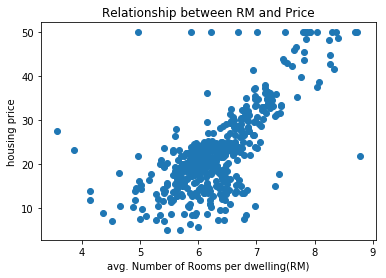

In [39]:
plt.scatter(bos.RM,bos.PRICE)
plt.xlabel("avg. Number of Rooms per dwelling(RM)")
plt.ylabel("housing price")
plt.title('Relationship between RM and Price')
plt.show()

In [40]:
LRM.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

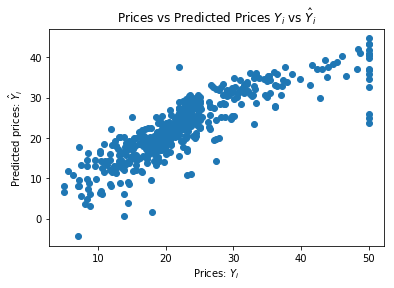

In [41]:
plt.scatter(bos.PRICE, LRM.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title('Prices vs Predicted Prices $Y_i$ vs $\hat{Y}_i$')
plt.show()

In [42]:
mseFull=np.mean( (bos.PRICE -LRM.predict(X)) )**2
print( "MeanSquare Error: ", mseFull)

MeanSquare Error:  2.4885567390825995e-29


In [44]:
XTrain = X[:-50]
XTest = X[-50:]
YTrain = bos.PRICE[:-50]
YTest = bos.PRICE[-50:]

print(XTrain.shape)
print(XTest.shape)
print(YTrain.shape)
print(YTest.shape)


(456, 13)
(50, 13)
(456,)
(50,)


In [47]:
XTrain,XTest,YTrain,YTest=sklearn.model_selection.train_test_split(X,bos.PRICE,test_size=.33,random_state=5)
print(XTrain.shape)
print(XTest.shape)
print(YTrain.shape)
print(YTest.shape)

(339, 13)
(167, 13)
(339,)
(167,)


In [48]:
LRM=LinearRegression()
LRM.fit(XTrain,YTrain)
pred_train=LRM.predict(XTrain)
pred_test = LRM.predict(XTest)

In [49]:
mseFull=np.mean( (bos.PRICE -LRM.predict(X)) )**2
print( "MeanSquare Error: ", mseFull)

MeanSquare Error:  0.049819251810069014


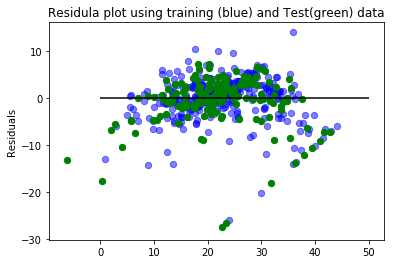

In [50]:
plt.scatter(LRM.predict(XTrain), LRM.predict(XTrain) - YTrain, c='b', s=40, alpha=0.5)
plt.scatter(LRM.predict(XTest), LRM.predict(XTest) - YTest, c='g', s=40 )
plt.hlines( y=0, xmin=0, xmax=50 )


plt.title('Residula plot using training (blue) and Test(green) data')
plt.ylabel("Residuals")
plt.show()